# New Section

In [ ]:
# Importing the tensorflow library
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
# Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid19Project/Data/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid19Project/Data/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/10
4/4 [==============================] - 54s 14s/step - loss: 0.7516 - accuracy: 0.5700 - val_loss: 0.4646 - val_accuracy: 0.9200
Epoch 2/10
4/4 [==============================] - 6s 2s/step - loss: 0.4769 - accuracy: 0.7700 - val_loss: 0.3370 - val_accuracy: 0.9300
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 0.3401 - accuracy: 0.8900 - val_loss: 0.2127 - val_accuracy: 0.9500
Epoch 4/10
4/4 [==============================] - 6s 2s/step - loss: 0.3512 - accuracy: 0.8700 - val_loss: 0.3348 - val_accuracy: 0.8500
Epoch 5/10
4/4 [==============================] - 6s 2s/step - loss: 0.3195 - accuracy: 0.8400 - val_loss: 0.1878 - val_accuracy: 0.9500
Epoch 6/10
4/4 [==============================] - 6s 2s/step - loss: 0.2919 - accuracy: 0.8600 - val_loss: 0.1757 - val_accuracy: 0.9600
Epoch 7/10
4/4 [==============================] - 6s 2s/step - loss: 0.2503 - accuracy: 0.8900 - val_loss: 0.2973 - val_accuracy: 0.8600
Epoch 8/10
4/4 [=======================

In [ ]:
classifier.save('/content/drive/MyDrive/covid19Project/my_model3.h5')

In [ ]:
# evaluation on test set
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/covid19Project/my_model3.h5')
loaded_model.evaluate(test_set)

4/4 [==============================] - 3s 651ms/step - loss: 0.1513 - accuracy: 0.9500


[0.15130439400672913, 0.949999988079071]

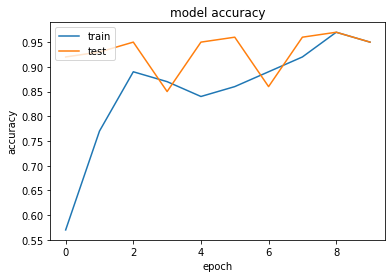

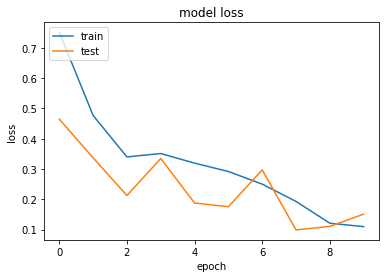

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Covid


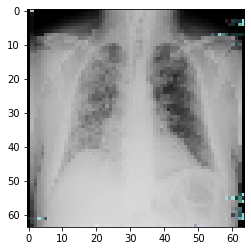

In [ ]:
# for only one prediction
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(r'/content/drive/MyDrive/covid19Project/Data/test/Covid/80446565-E090-4187-A031-9D3CEAA586C8.jpeg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

Normal


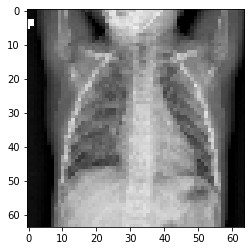

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(r'/content/drive/MyDrive/covid19Project/Data/test/Normal/IM-0235-0001.jpeg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

In [ ]:
# plot confusion matrix
y_pred = []
y_test = []
import os

for i in os.listdir("/content/drive/MyDrive/covid19Project/Data/test/Normal"):
    img = image.load_img("/content/drive/MyDrive/covid19Project/Data/test/Normal/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(1)

for i in os.listdir("/content/drive/MyDrive/covid19Project/Data/test/Covid"):
    img = image.load_img("/content/drive/MyDrive/covid19Project/Data/test/Covid/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

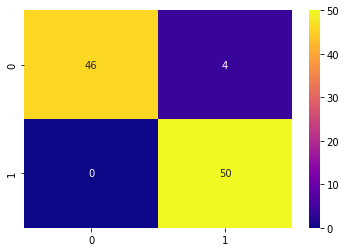

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.93      1.00      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred, y_test.round())
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test.round()))